In [1]:
# import data science and visualization libraries
%matplotlib inline
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# download the raw data and unzip
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz
!gunzip covtype.data.gz

--2018-08-17 16:41:18--  https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11240707 (11M) [application/x-gzip]
Saving to: ‘covtype.data.gz’

covtype.data.gz     100%[===================>]  10.72M  4.08MB/s    in 2.6s    

2018-08-17 16:41:22 (4.08 MB/s) - ‘covtype.data.gz’ saved [11240707/11240707]



In [3]:
# read the csv and extract features and labels
covtype = pd.read_csv('covtype.data', delimiter=',', dtype='float32').as_matrix()
covtype_features, covtype_labels = covtype[:, :54], covtype[:, 54]
# transform labels to 0 index
covtype_labels -= 1
# shuffle and split into train and test sets
np.random.seed(0)
train_features, test_features, train_labels, test_labels = train_test_split(
    covtype_features, covtype_labels, test_size=0.2)
# further split the test set into validation and test sets
val_features, test_features, val_labels, test_labels = train_test_split(
    test_features, test_labels, test_size=0.5)

In [23]:
covtype_labels

array([4., 1., 1., ..., 2., 2., 2.], dtype=float32)

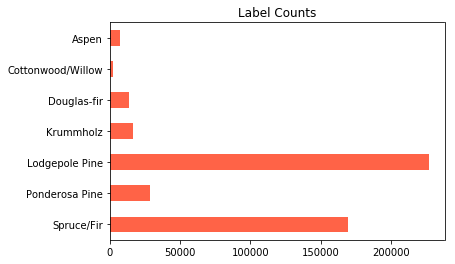

In [12]:
# assign label names and count label frequencies
label_map = {0:'Spruce/Fir', 1:'Lodgepole Pine', 2:'Ponderosa Pine', 3:'Cottonwood/Willow', 
             4:'Aspen', 5:'Douglas-fir', 6:'Krummholz'}
label_counts = pd.DataFrame(data=train_labels)[0].map(label_map).value_counts(sort=False).sort_index(ascending=False)
label_counts.plot('barh', color='tomato', title='Label Counts')

In [13]:
import sagemaker
from sagemaker.amazon.amazon_estimator import RecordSet
import boto3

# instantiate the LinearLearner estimator object
multiclass_estimator = sagemaker.LinearLearner(role=sagemaker.get_execution_role(),
                                               train_instance_count=1,
                                               train_instance_type='ml.m4.xlarge',
                                               predictor_type='multiclass_classifier',
                                               num_classes=7)

INFO:sagemaker:Created S3 bucket: sagemaker-us-east-1-887931365560


In [14]:
# wrap data in RecordSet objects
train_records = multiclass_estimator.record_set(train_features, train_labels, channel='train')
val_records = multiclass_estimator.record_set(val_features, val_labels, channel='validation')
test_records = multiclass_estimator.record_set(test_features, test_labels, channel='test')

In [15]:
# start a training job
multiclass_estimator.fit([train_records, val_records, test_records])

INFO:sagemaker:Creating training-job with name: linear-learner-2018-08-17-16-44-15-410


......................
Docker entrypoint called with argument(s): train
[08/17/2018 16:47:45 INFO 140595548530496] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/default-input.json: {u'loss_insensitivity': u'0.01', u'epochs': u'15', u'init_bias': u'0.0', u'lr_scheduler_factor': u'auto', u'num_calibration_samples': u'10000000', u'accuracy_top_k': u'3', u'_num_kv_servers': u'auto', u'use_bias': u'true', u'num_point_for_scaler': u'10000', u'_log_level': u'info', u'quantile': u'0.5', u'bias_lr_mult': u'auto', u'lr_scheduler_step': u'auto', u'init_method': u'uniform', u'init_sigma': u'0.01', u'lr_scheduler_minimum_lr': u'auto', u'target_recall': u'0.8', u'num_models': u'auto', u'early_stopping_patience': u'3', u'momentum': u'auto', u'unbias_label': u'auto', u'wd': u'auto', u'optimizer': u'auto', u'_tuning_objective_metric': u'', u'early_stopping_tolerance': u'0.001', u'learning_rate': u'auto', u'_kvstore': u'auto', u'normalize_data': u'true', u'binary_c

#metrics {"Metrics": {"train_multiclass_cross_entropy_objective": {"count": 1, "max": 0.720069316995555, "sum": 0.720069316995555, "min": 0.720069316995555}}, "EndTime": 1534524497.007574, "Dimensions": {"model": 0, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 0}, "StartTime": 1534524497.007438}

#metrics {"Metrics": {"train_multiclass_cross_entropy_objective": {"count": 1, "max": 0.9236036409838446, "sum": 0.9236036409838446, "min": 0.9236036409838446}}, "EndTime": 1534524497.007834, "Dimensions": {"model": 1, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 0}, "StartTime": 1534524497.007806}

#metrics {"Metrics": {"train_multiclass_cross_entropy_objective": {"count": 1, "max": 0.7081193066301017, "sum": 0.7081193066301017, "min": 0.7081193066301017}}, "EndTime": 1534524497.007981, "Dimensions": {"model": 2, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 0}, "StartTime": 153452

#metrics {"Metrics": {"train_multiclass_cross_entropy_objective": {"count": 1, "max": 0.7026629504499764, "sum": 0.7026629504499764, "min": 0.7026629504499764}}, "EndTime": 1534524529.721818, "Dimensions": {"model": 0, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 1}, "StartTime": 1534524529.721757}

#metrics {"Metrics": {"train_multiclass_cross_entropy_objective": {"count": 1, "max": 0.9177262252281452, "sum": 0.9177262252281452, "min": 0.9177262252281452}}, "EndTime": 1534524529.721899, "Dimensions": {"model": 1, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 1}, "StartTime": 1534524529.721885}

#metrics {"Metrics": {"train_multiclass_cross_entropy_objective": {"count": 1, "max": 0.6660553830903152, "sum": 0.6660553830903152, "min": 0.6660553830903152}}, "EndTime": 1534524529.721957, "Dimensions": {"model": 2, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 1}, "StartTime": 153

#metrics {"Metrics": {"train_multiclass_cross_entropy_objective": {"count": 1, "max": 0.701227479079674, "sum": 0.701227479079674, "min": 0.701227479079674}}, "EndTime": 1534524562.490567, "Dimensions": {"model": 0, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 2}, "StartTime": 1534524562.490506}

#metrics {"Metrics": {"train_multiclass_cross_entropy_objective": {"count": 1, "max": 0.9154508131619158, "sum": 0.9154508131619158, "min": 0.9154508131619158}}, "EndTime": 1534524562.490647, "Dimensions": {"model": 1, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 2}, "StartTime": 1534524562.490634}

#metrics {"Metrics": {"train_multiclass_cross_entropy_objective": {"count": 1, "max": 0.6565742278263487, "sum": 0.6565742278263487, "min": 0.6565742278263487}}, "EndTime": 1534524562.490704, "Dimensions": {"model": 2, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 2}, "StartTime": 153452

#metrics {"Metrics": {"train_multiclass_cross_entropy_objective": {"count": 1, "max": 0.7006394483632055, "sum": 0.7006394483632055, "min": 0.7006394483632055}}, "EndTime": 1534524595.190112, "Dimensions": {"model": 0, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 3}, "StartTime": 1534524595.19005}

#metrics {"Metrics": {"train_multiclass_cross_entropy_objective": {"count": 1, "max": 0.913514418634875, "sum": 0.913514418634875, "min": 0.913514418634875}}, "EndTime": 1534524595.190226, "Dimensions": {"model": 1, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 3}, "StartTime": 1534524595.190205}

#metrics {"Metrics": {"train_multiclass_cross_entropy_objective": {"count": 1, "max": 0.6531929176593649, "sum": 0.6531929176593649, "min": 0.6531929176593649}}, "EndTime": 1534524595.190308, "Dimensions": {"model": 2, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 3}, "StartTime": 1534524

#metrics {"Metrics": {"train_multiclass_cross_entropy_objective": {"count": 1, "max": 0.7003866995449723, "sum": 0.7003866995449723, "min": 0.7003866995449723}}, "EndTime": 1534524627.998412, "Dimensions": {"model": 0, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 4}, "StartTime": 1534524627.998321}

#metrics {"Metrics": {"train_multiclass_cross_entropy_objective": {"count": 1, "max": 0.9119646151312466, "sum": 0.9119646151312466, "min": 0.9119646151312466}}, "EndTime": 1534524627.998549, "Dimensions": {"model": 1, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 4}, "StartTime": 1534524627.998527}

#metrics {"Metrics": {"train_multiclass_cross_entropy_objective": {"count": 1, "max": 0.6517730878632644, "sum": 0.6517730878632644, "min": 0.6517730878632644}}, "EndTime": 1534524627.998622, "Dimensions": {"model": 2, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 4}, "StartTime": 153

#metrics {"Metrics": {"train_multiclass_cross_entropy_objective": {"count": 1, "max": 0.7002396024506667, "sum": 0.7002396024506667, "min": 0.7002396024506667}}, "EndTime": 1534524660.697375, "Dimensions": {"model": 0, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 5}, "StartTime": 1534524660.697313}

#metrics {"Metrics": {"train_multiclass_cross_entropy_objective": {"count": 1, "max": 0.9106482225615403, "sum": 0.9106482225615403, "min": 0.9106482225615403}}, "EndTime": 1534524660.697458, "Dimensions": {"model": 1, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 5}, "StartTime": 1534524660.697444}

#metrics {"Metrics": {"train_multiclass_cross_entropy_objective": {"count": 1, "max": 0.6511145664083546, "sum": 0.6511145664083546, "min": 0.6511145664083546}}, "EndTime": 1534524660.697523, "Dimensions": {"model": 2, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 5}, "StartTime": 153

#metrics {"Metrics": {"train_multiclass_cross_entropy_objective": {"count": 1, "max": 0.700170733221646, "sum": 0.700170733221646, "min": 0.700170733221646}}, "EndTime": 1534524693.666914, "Dimensions": {"model": 0, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 6}, "StartTime": 1534524693.666849}

#metrics {"Metrics": {"train_multiclass_cross_entropy_objective": {"count": 1, "max": 0.9095515276152513, "sum": 0.9095515276152513, "min": 0.9095515276152513}}, "EndTime": 1534524693.666998, "Dimensions": {"model": 1, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 6}, "StartTime": 1534524693.666984}

#metrics {"Metrics": {"train_multiclass_cross_entropy_objective": {"count": 1, "max": 0.650783144983752, "sum": 0.650783144983752, "min": 0.650783144983752}}, "EndTime": 1534524693.667058, "Dimensions": {"model": 2, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 6}, "StartTime": 153452469

#metrics {"Metrics": {"train_multiclass_cross_entropy_objective": {"count": 1, "max": 0.7001357298226192, "sum": 0.7001357298226192, "min": 0.7001357298226192}}, "EndTime": 1534524726.590403, "Dimensions": {"model": 0, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 7}, "StartTime": 1534524726.590342}

#metrics {"Metrics": {"train_multiclass_cross_entropy_objective": {"count": 1, "max": 0.9086279903280324, "sum": 0.9086279903280324, "min": 0.9086279903280324}}, "EndTime": 1534524726.590486, "Dimensions": {"model": 1, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 7}, "StartTime": 1534524726.590472}

#metrics {"Metrics": {"train_multiclass_cross_entropy_objective": {"count": 1, "max": 0.6506086548114645, "sum": 0.6506086548114645, "min": 0.6506086548114645}}, "EndTime": 1534524726.590545, "Dimensions": {"model": 2, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 7}, "StartTime": 153

#metrics {"Metrics": {"train_multiclass_cross_entropy_objective": {"count": 1, "max": 0.7001228948132745, "sum": 0.7001228948132745, "min": 0.7001228948132745}}, "EndTime": 1534524759.36423, "Dimensions": {"model": 0, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 8}, "StartTime": 1534524759.364166}

#metrics {"Metrics": {"train_multiclass_cross_entropy_objective": {"count": 1, "max": 0.9078540820417733, "sum": 0.9078540820417733, "min": 0.9078540820417733}}, "EndTime": 1534524759.364313, "Dimensions": {"model": 1, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 8}, "StartTime": 1534524759.364299}

#metrics {"Metrics": {"train_multiclass_cross_entropy_objective": {"count": 1, "max": 0.650513158206282, "sum": 0.650513158206282, "min": 0.650513158206282}}, "EndTime": 1534524759.364378, "Dimensions": {"model": 2, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 8}, "StartTime": 1534524


Billable seconds: 413


In [16]:
# deploy a model hosting endpoint
multiclass_predictor = multiclass_estimator.deploy(initial_instance_count=1, instance_type='ml.m4.xlarge')

INFO:sagemaker:Creating model with name: linear-learner-2018-08-17-16-54-12-367
INFO:sagemaker:Creating endpoint with name linear-learner-2018-08-17-16-44-15-410


--------------------------------------------------------------------------!

In [19]:
def evaluate_metrics(predictor, test_features, test_labels):
    """
    Evaluate a model on a test set using the given prediction endpoint. Display classification metrics.
    """
    # split the test dataset into 100 batches and evaluate using prediction endpoint
    prediction_batches = [predictor.predict(batch) for batch in np.array_split(test_features, 100)]

    # parse protobuf responses to extract predicted labels
    extract_label = lambda x: x.label['predicted_label'].float32_tensor.values
    test_preds = np.concatenate([np.array([extract_label(x) for x in batch]) for batch in prediction_batches])
    test_preds = test_preds.reshape((-1,))
    
    # calculate accuracy
    accuracy = (test_preds == test_labels).sum() / test_labels.shape[0]
    
    # calculate recall for each class
    recall_per_class, classes = [], []
    for target_label in np.unique(test_labels):
        recall_numerator = np.logical_and(test_preds == target_label, test_labels == target_label).sum()
        recall_denominator = (test_labels == target_label).sum()
        recall_per_class.append(recall_numerator / recall_denominator)
        classes.append(label_map[target_label])
    recall = pd.DataFrame({'recall': recall_per_class, 'class_label': classes})
    recall.sort_values('class_label', ascending=False, inplace=True)

    # calculate confusion matrix
    label_mapper = np.vectorize(lambda x: label_map[x])
    confusion_matrix = pd.crosstab(label_mapper(test_labels), label_mapper(test_preds), 
                                   rownames=['Actuals'], colnames=['Predictions'], normalize='index')

    # display results
    sns.heatmap(confusion_matrix, annot=True, fmt='.2f', cmap="YlGnBu").set_title('Confusion Matrix')  
    ax = recall.plot(kind='barh', x='class_label', y='recall', color='steelblue', title='Recall', legend=False)
    ax.set_ylabel('')
    print('Accuracy: {:.3f}'.format(accuracy))

Accuracy: 0.722


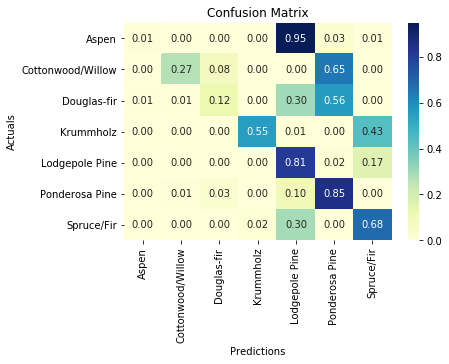

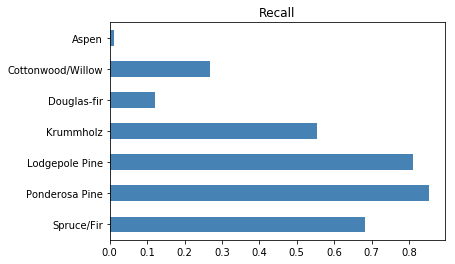

In [20]:
evaluate_metrics(multiclass_predictor, test_features, test_labels)

In [21]:
multiclass_predictor.delete_endpoint()

INFO:sagemaker:Deleting endpoint with name: linear-learner-2018-08-17-16-44-15-410
